## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit-card.data to credit-card.data


In [ ]:
data=pd.read_csv('/content/credit-card.data',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## **Data Preprocessing**

In [ ]:
column_names=['Gender' ,	 'Age'	,'Debt',	'Married'	,'BankCustomer' ,	'Industry'	, 'Ethnicity'	,'YearsEmployed'	,'PriorDefault',	'Employed',	'CreditScore'	,'DriversLicense'	,'Citizen'	,'ZipCode',	'Income'	,'Approved']
data.columns = column_names

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


##**Checking Null Values**

In [ ]:
data.isna().sum()

,0
Gender,0
Age,0
Debt,0
Married,0
BankCustomer,0
Industry,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


##**Replacing Null Values**

In [ ]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
mean_age = data['Age'].mean()
data['Age'] = data['Age'].replace(to_replace='?', value=str(int(mean_age)))
data['Age'].fillna(mean_age, inplace=True)

<ipython-input-6-c6897e2531a7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(mean_age, inplace=True)


In [ ]:
data.drop('ZipCode', axis=1, inplace=True)
print(data.head())


  Gender    Age   Debt Married BankCustomer Industry Ethnicity  YearsEmployed  \
0      b  30.83  0.000       u            g        w         v           1.25   
1      a  58.67  4.460       u            g        q         h           3.04   
2      a  24.50  0.500       u            g        q         h           1.50   
3      b  27.83  1.540       u            g        w         v           3.75   
4      b  20.17  5.625       u            g        w         v           1.71   

  PriorDefault Employed  CreditScore DriversLicense Citizen  Income Approved  
0            t        t            1              f       g       0        +  
1            t        t            6              f       g     560        +  
2            t        f            0              f       g     824        +  
3            t        t            5              t       g       3        +  
4            t        f            0              f       s       0        +  


In [ ]:
data['Married'] = data['Married'].replace({'?':'u', 'l':'u'})
data['Gender'] = data['Gender'].replace('?', 'b')
data['BankCustomer'] = data['BankCustomer'].replace({'?':'g', 'gg':'g'})
data['Citizen'] = data['Citizen'].replace('p', 'g')
data['Industry'] = data['Industry'].replace('?', 'c')
data['Ethnicity'] = data['Ethnicity'].replace('?', 'v')
data['Approved'] = data['Approved'].replace('+','1')
data['Approved'] = data['Approved'].replace('-','0')
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  Income          690 non-null    int64  
 14  Approved        690 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 81.0+ KB


In [ ]:
data.shape[1]

15

In [ ]:
for i in range(data.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

['b' 'a']
Gender
b    480
a    210
Name: count, dtype: int64
[30.83       58.67       24.5        27.83       20.17       32.08
 33.17       22.92       54.42       42.5        22.08       29.92
 38.25       48.08       45.83       36.67       28.25       23.25
 21.83       19.17       25.         47.75       27.42       41.17
 15.83       47.         56.58       57.42       42.08       29.25
 42.         49.5        36.75       22.58       27.25       23.
 27.75       54.58       34.17       28.92       29.67       39.58
 56.42       54.33       41.         31.92       41.5        23.92
 25.75       26.         37.42       34.92       34.25       23.33
 23.17       44.33       35.17       43.25       56.75       31.67
 23.42       20.42       26.67       36.         25.5        19.42
 32.33       34.83       38.58       44.25       44.83       20.67
 34.08       21.67       21.5        49.58       27.67       39.83
 31.56817109 37.17       25.67       34.         49.         62.5
 31.

In [ ]:
data.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.853273,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


**Dropping the column 15 and assigning it as target variable**

In [ ]:
X=data.drop(["Approved"],axis=1)
print(X)
y=data["Approved"]
print(y)

    Gender    Age    Debt Married BankCustomer Industry Ethnicity  \
0        b  30.83   0.000       u            g        w         v   
1        a  58.67   4.460       u            g        q         h   
2        a  24.50   0.500       u            g        q         h   
3        b  27.83   1.540       u            g        w         v   
4        b  20.17   5.625       u            g        w         v   
..     ...    ...     ...     ...          ...      ...       ...   
685      b  21.08  10.085       y            p        e         h   
686      a  22.67   0.750       u            g        c         v   
687      a  25.25  13.500       y            p       ff        ff   
688      b  17.92   0.205       u            g       aa         v   
689      b  35.00   3.375       u            g        c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0             1.25            t        t            1              f       g   
1          

**Creating the dummy variables**

In [ ]:
X=pd.get_dummies(X,dtype='int',drop_first=True)
print(X)

       Age    Debt  YearsEmployed  CreditScore  Income  Gender_b  Married_y  \
0    30.83   0.000           1.25            1       0         1          0   
1    58.67   4.460           3.04            6     560         0          0   
2    24.50   0.500           1.50            0     824         0          0   
3    27.83   1.540           3.75            5       3         1          0   
4    20.17   5.625           1.71            0       0         1          0   
..     ...     ...            ...          ...     ...       ...        ...   
685  21.08  10.085           1.25            0       0         1          1   
686  22.67   0.750           2.00            2     394         0          0   
687  25.25  13.500           2.00            1       1         0          1   
688  17.92   0.205           0.04            0     750         1          0   
689  35.00   3.375           8.29            0       0         1          0   

     BankCustomer_p  Industry_c  Industry_cc  ...  

##**Exploratory Data Anaylsis**

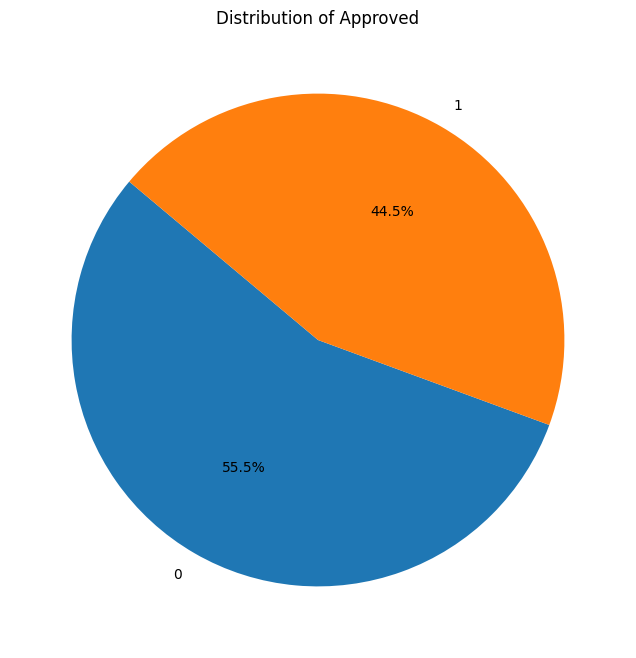

In [ ]:
column_name = 'Approved'  # Change this to the column you want to visualize
column_data = data[column_name].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of {column_name}")
plt.show()

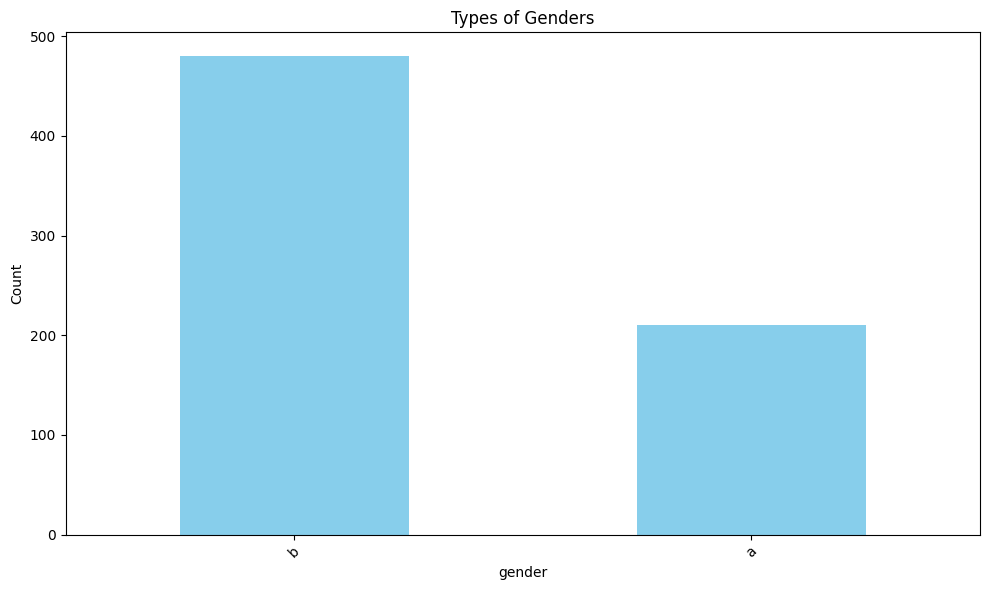

In [ ]:
industry_counts = data['Gender'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')

# Customize the chart
plt.title('Types of Genders')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

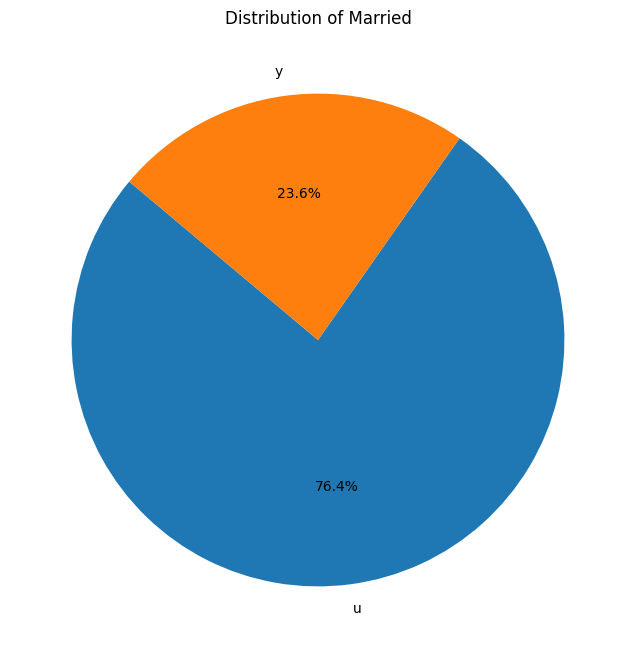

In [ ]:
column_name = 'Married'  # Change this to the column you want to visualize
column_data = data[column_name].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of {column_name}")
plt.show()

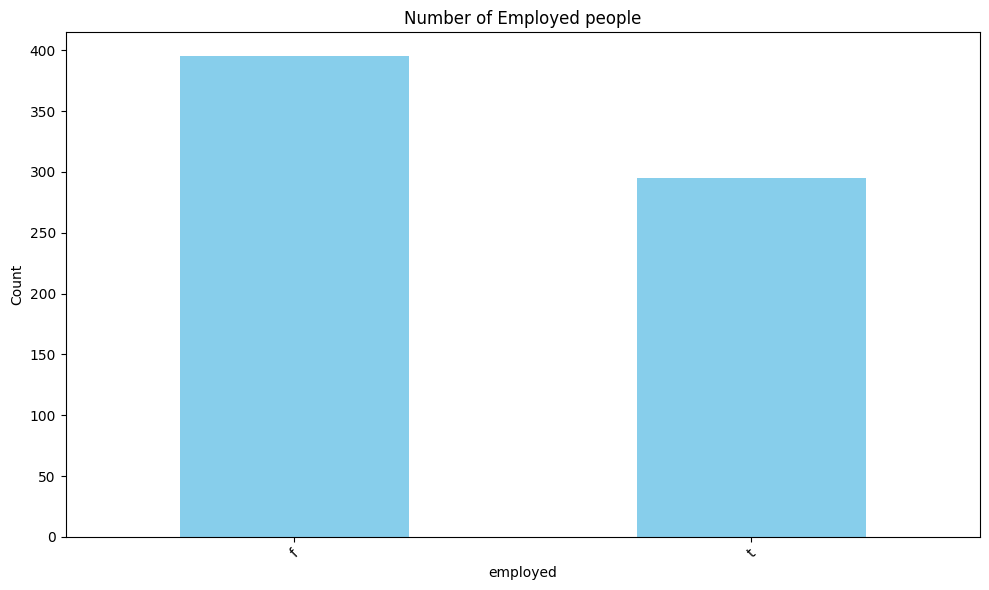

In [ ]:
industry_counts = data['Employed'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')

# Customize the chart
plt.title('Number of Employed people')
plt.xlabel('employed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

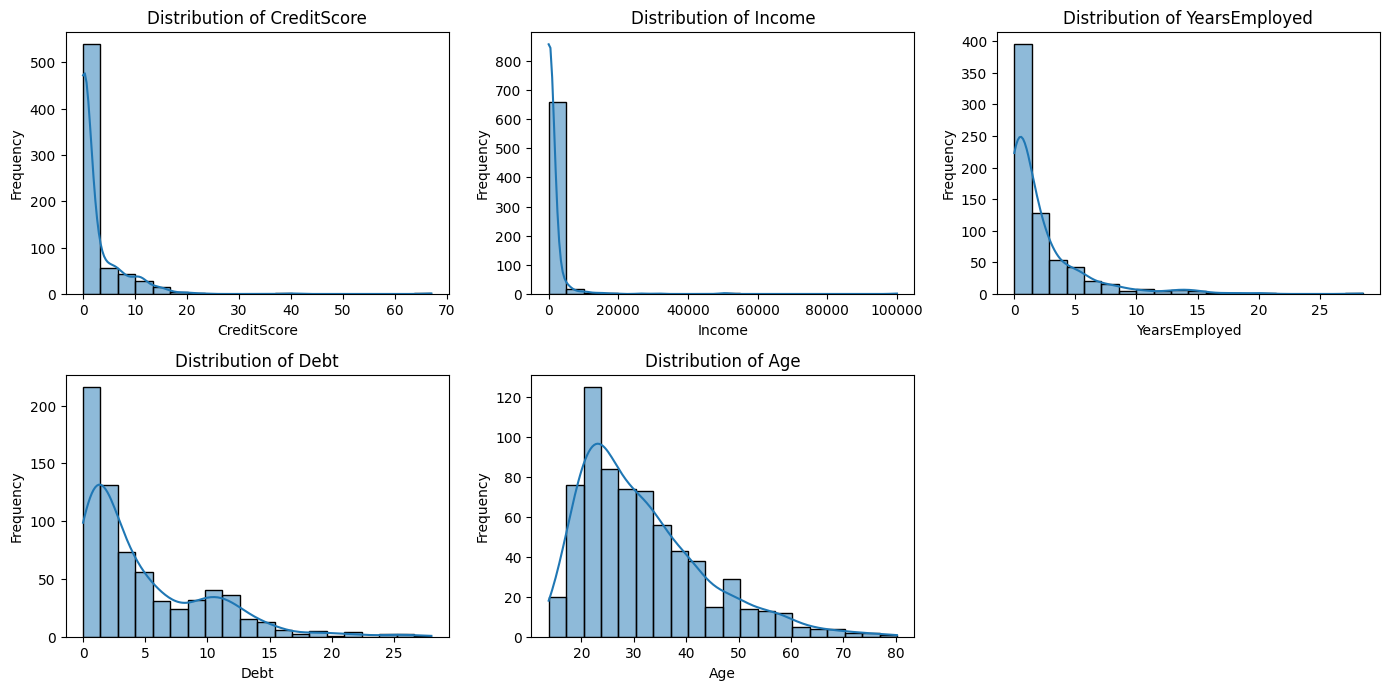

In [ ]:
plt.figure(figsize=(14, 10))

# List of continuous attributes to plot
continuous_attributes = ['CreditScore','Income','YearsEmployed','Debt','Age']

for i, attribute in enumerate(continuous_attributes, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data[attribute], bins=20, kde=True)  # KDE adds a density plot
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

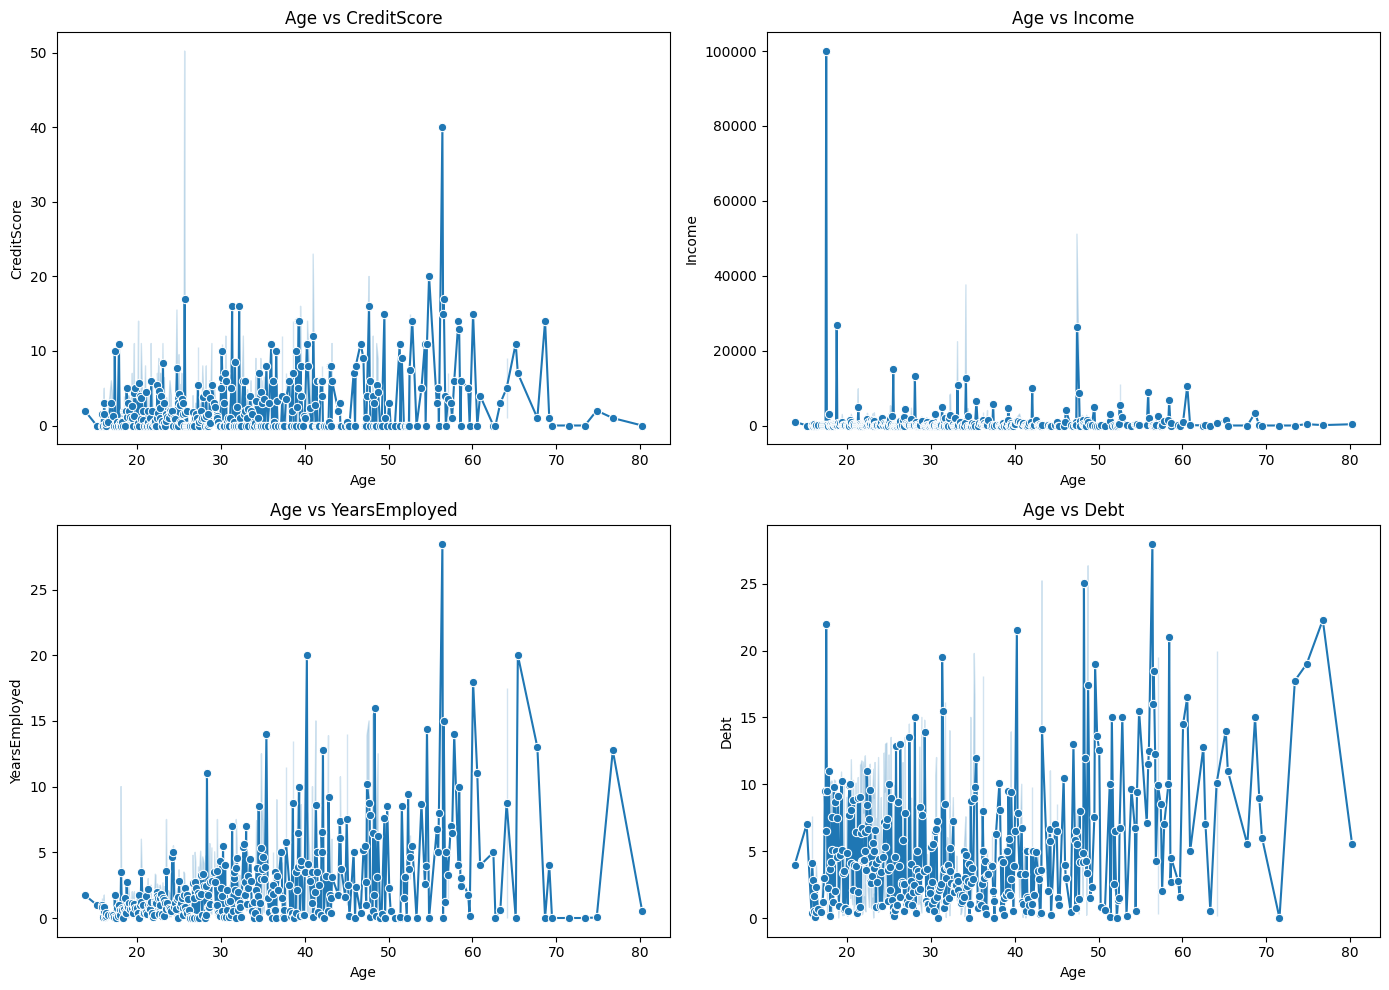

In [ ]:
plt.figure(figsize=(14, 10))

# List of continuous attributes to plot
continuous_attributes = ['CreditScore','Income','YearsEmployed','Debt']

for i, attribute in enumerate(continuous_attributes, start=1):
    plt.subplot(2, 2, i)
    sns.lineplot(data, x='Age', y=attribute, marker='o')
    plt.title(f'Age vs {attribute}')
    plt.xlabel('Age')
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

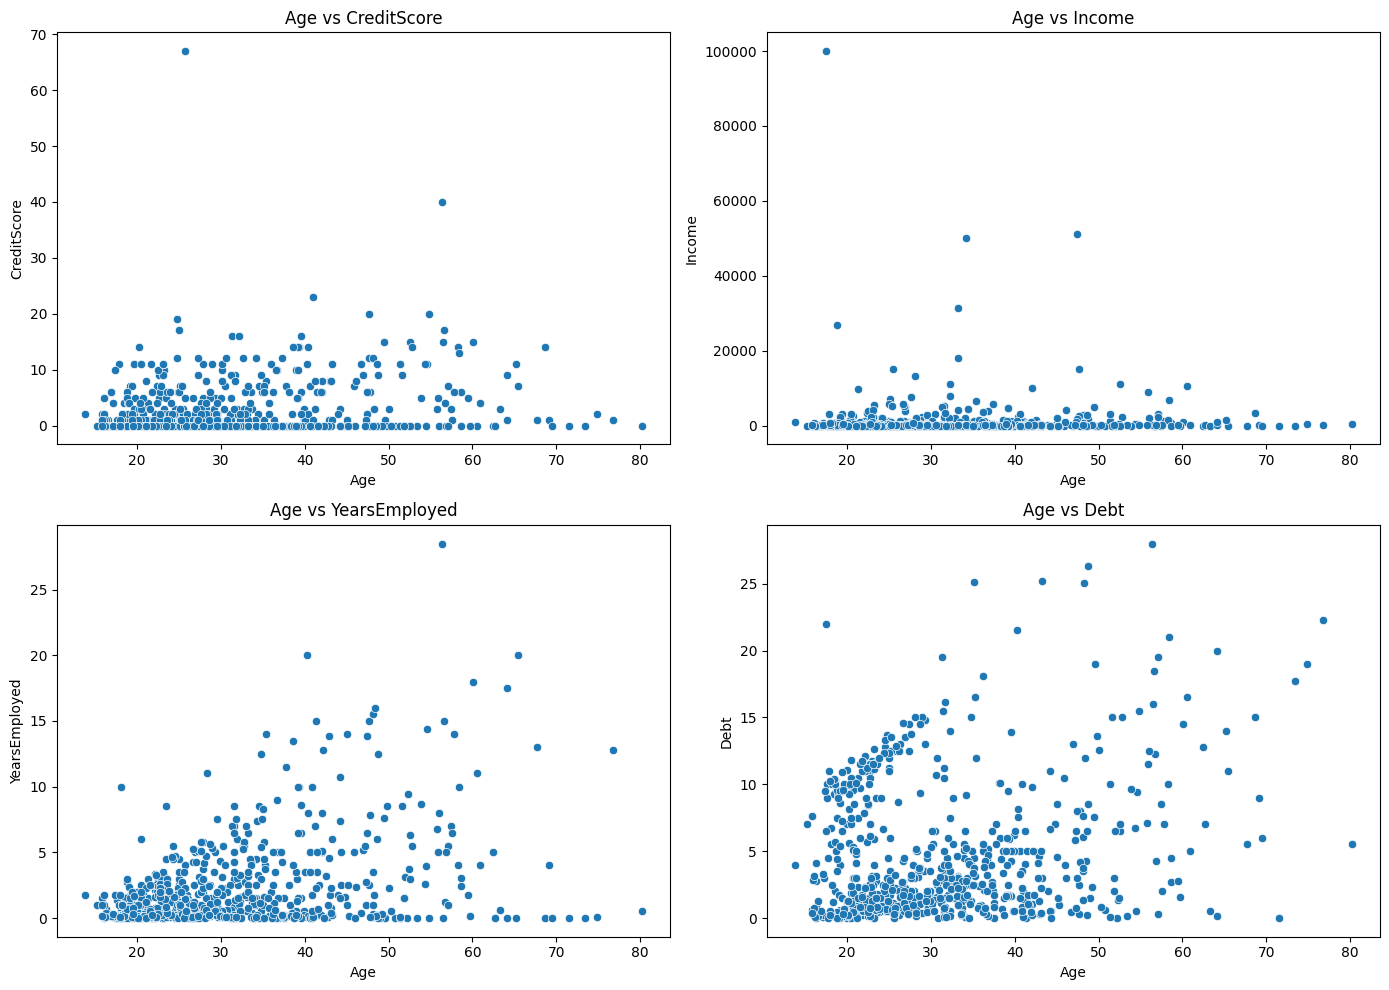

In [ ]:
continuous_attributes = ['CreditScore','Income','YearsEmployed','Debt']

plt.figure(figsize=(14, 10))

for i, attribute in enumerate(continuous_attributes, start=1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data, x='Age', y=attribute)
    plt.title(f'Age vs {attribute}')
    plt.xlabel('Age')
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

In [ ]:
c=data.select_dtypes(include="number").corr()
c

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.201316,0.392787,0.185575,0.018539
Debt,0.201316,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.392787,0.298902,1.000000,0.322330,0.051345
CreditScore,0.185575,0.271207,0.322330,1.000000,0.063692
Income,0.018539,0.123121,0.051345,0.063692,1.000000


<Axes: >

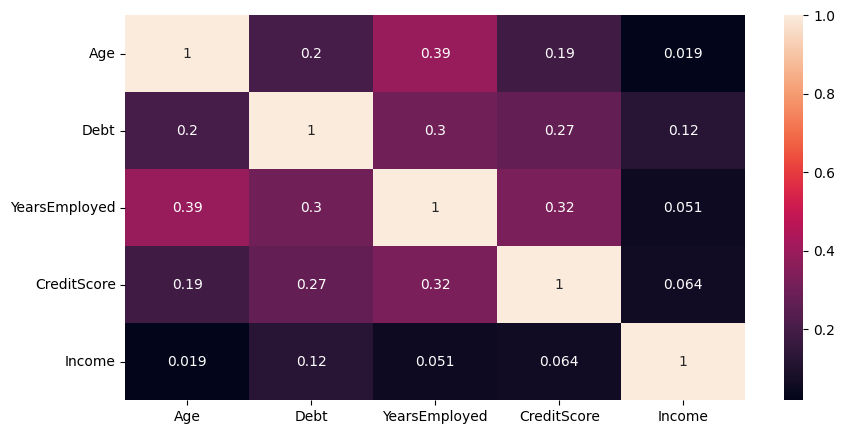

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(c,annot=True)

# LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.40, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train4 ,X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

60-40

In [ ]:
logreg.fit(X_train1, y_train1)
predictions = logreg.predict(X_test1)
print(predictions)

['0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1'
 '1' '1' '1' '1' '1' '1' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0'
 '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'
 '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '0' '1' '0' '0' '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '0' '0'
 '1' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '1' '0'
 '0' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '1' '0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
z=confusion_matrix(y_test1, predictions)
print(z)
accuracy_score(y_test1,predictions)

[[123  28]
 [ 21 104]]


0.822463768115942

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       151
           1       0.79      0.83      0.81       125

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



70-30

In [ ]:
logreg.fit(X_train2, y_train2)
predictions = logreg.predict(X_test2)
print(predictions)

['0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0'
 '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'
 '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '0' '1']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test2, predictions)
print(z)
accuracy_score(y_test2,predictions)

[[90 20]
 [16 81]]


0.8260869565217391

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       110
           1       0.80      0.84      0.82        97

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207



75-25

In [ ]:
logreg.fit(X_train3, y_train3)
predictions = logreg.predict(X_test3)
print(predictions)

['0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '1'
 '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'
 '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test3, predictions)
print(z)
accuracy_score(y_test3,predictions)

[[73 18]
 [12 70]]


0.8265895953757225

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test3,predictions))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        91
           1       0.80      0.85      0.82        82

    accuracy                           0.83       173
   macro avg       0.83      0.83      0.83       173
weighted avg       0.83      0.83      0.83       173



80-20

In [ ]:
logreg.fit(X_train4, y_train4)
predictions = logreg.predict(X_test4)
print(predictions)

['0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '1'
 '0' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '1'
 '0' '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test4, predictions)
print(z)
accuracy_score(y_test4,predictions)

[[53 15]
 [11 59]]


0.8115942028985508

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test4,predictions))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        68
           1       0.80      0.84      0.82        70

    accuracy                           0.81       138
   macro avg       0.81      0.81      0.81       138
weighted avg       0.81      0.81      0.81       138



# **VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Age,9.2
1,Debt,2.4
2,YearsEmployed,2.1
3,CreditScore,2.1
4,Income,1.6
5,Gender_b,3.7
6,Married_y,inf
7,BankCustomer_p,inf
8,Industry_c,3.1
9,Industry_cc,1.7


In [ ]:
calc_vif(X.drop('Married_y', axis=1))

,variables,VIF
0,Age,9.2
1,Debt,2.4
2,YearsEmployed,2.1
3,CreditScore,2.1
4,Income,1.6
5,Gender_b,3.7
6,BankCustomer_p,1.4
7,Industry_c,3.1
8,Industry_cc,1.7
9,Industry_d,1.5


In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff'], axis=1))

,variables,VIF
0,Age,9.1
1,Debt,2.4
2,YearsEmployed,2.1
3,CreditScore,2.1
4,Income,1.5
5,Gender_b,3.7
6,BankCustomer_p,1.4
7,Industry_c,3.0
8,Industry_cc,1.7
9,Industry_d,1.5


In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age'], axis=1))

,variables,VIF
0,Debt,2.3
1,YearsEmployed,2.0
2,CreditScore,2.1
3,Income,1.5
4,Gender_b,3.6
5,BankCustomer_p,1.4
6,Industry_c,2.7
7,Industry_cc,1.6
8,Industry_d,1.4
9,Industry_e,2.6


In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age','Industry_j'], axis=1))

,variables,VIF
0,Debt,2.3
1,YearsEmployed,2.0
2,CreditScore,2.1
3,Income,1.5
4,Gender_b,3.6
5,BankCustomer_p,1.4
6,Industry_c,2.7
7,Industry_cc,1.6
8,Industry_d,1.4
9,Industry_e,2.6


In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age','Industry_j','Ethnicity_v'], axis=1))

,variables,VIF
0,Debt,2.3
1,YearsEmployed,1.9
2,CreditScore,2.1
3,Income,1.5
4,Gender_b,3.5
5,BankCustomer_p,1.4
6,Industry_c,2.0
7,Industry_cc,1.4
8,Industry_d,1.3
9,Industry_e,2.6


In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age','Industry_j','Ethnicity_v','Gender_b'], axis=1))

,variables,VIF
0,Debt,2.2
1,YearsEmployed,1.9
2,CreditScore,2.1
3,Income,1.5
4,BankCustomer_p,1.3
5,Industry_c,1.6
6,Industry_cc,1.3
7,Industry_d,1.2
8,Industry_e,2.5
9,Industry_ff,1.2


In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age','Industry_j','Ethnicity_v','Gender_b','Income'], axis=1))

,variables,VIF
0,Debt,2.2
1,YearsEmployed,1.9
2,CreditScore,2.1
3,BankCustomer_p,1.3
4,Industry_c,1.6
5,Industry_cc,1.3
6,Industry_d,1.2
7,Industry_e,2.4
8,Industry_ff,1.2
9,Industry_i,1.2


In [ ]:
calc_vif(X.drop(['Married_y','Ethnicity_ff','Age','Industry_j','Ethnicity_v','Gender_b','Income','PriorDefault_t'], axis=1))

,variables,VIF
0,Debt,2.2
1,YearsEmployed,1.9
2,CreditScore,2.1
3,BankCustomer_p,1.3
4,Industry_c,1.6
5,Industry_cc,1.2
6,Industry_d,1.2
7,Industry_e,2.4
8,Industry_ff,1.2
9,Industry_i,1.2


In [ ]:
X_nomulti=X.drop(['Married_y','Ethnicity_ff','Age','Industry_j','Ethnicity_v','Gender_b','Income','PriorDefault_t'], axis=1)

In [ ]:
X_train1_nomulti, X_test1_nomulti, y_train1_nomulti, y_test1_nomulti = train_test_split(X_nomulti, y, test_size=0.40, random_state=42)
X_train2_nomulti, X_test2_nomulti, y_train2_nomulti, y_test2_nomulti = train_test_split(X_nomulti, y, test_size=0.30, random_state=42)
X_train3_nomulti, X_test3_nomulti, y_train3_nomulti, y_test3_nomulti = train_test_split(X_nomulti, y, test_size=0.25, random_state=42)
X_train4_nomulti, X_test4_nomulti, y_train4_nomulti, y_test4_nomulti = train_test_split(X_nomulti, y, test_size=0.20, random_state=42)

# logistic regression after **VIF**

60-40

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train1_nomulti, y_train1_nomulti)
predictions1 = logreg.predict(X_test1_nomulti)
print(predictions1)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1'
 '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '1' '1' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '0' '0'
 '0' '1' '1' '1' '1' '0' '0' '0' '1' '1' '1' '1' '0' '1' '0' '0' '1' '1'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0'
 '1' '1' '1' '1' '1' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '1' '1' '1'
 '1' '1' '0' '1' '0' '1' '1' '0' '1' '1' '0' '0' '1' '1' '1' '0' '0' '1'
 '0' '0' '1' '0' '0' '1' '1' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test1_nomulti, predictions1)
z

array([[121,  30],
       [ 32,  93]])

In [ ]:
accuracy_score(y_test1_nomulti,predictions1)

0.7753623188405797

In [ ]:
print(classification_report(y_test1_nomulti,predictions1))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.76      0.74      0.75       125

    accuracy                           0.78       276
   macro avg       0.77      0.77      0.77       276
weighted avg       0.78      0.78      0.78       276



70-30

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train2_nomulti, y_train2_nomulti)
predictions2 = logreg.predict(X_test2_nomulti)
print(predictions2)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0'
 '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0'
 '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1'
 '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '0' '0'
 '0' '1' '1' '1' '1' '0' '0' '0' '1' '1' '1' '1' '0' '1' '0' '0' '1' '1'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1'
 '1' '1' '0' '1' '0' '1' '0' '0' '1']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test2_nomulti, predictions2)
z

array([[90, 20],
       [33, 64]])

In [ ]:
accuracy_score(y_test2_nomulti,predictions2)

0.7439613526570048

In [ ]:
print(classification_report(y_test2_nomulti,predictions2))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       110
           1       0.76      0.66      0.71        97

    accuracy                           0.74       207
   macro avg       0.75      0.74      0.74       207
weighted avg       0.75      0.74      0.74       207



75-25

In [ ]:
logreg.fit(X_train3_nomulti, y_train3_nomulti)
predictions3 = logreg.predict(X_test3_nomulti)
print(predictions3)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '1' '1' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0'
 '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1'
 '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1' '0' '0'
 '0' '1' '1' '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '0' '0' '1' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '0' '1' '1' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test3_nomulti, predictions3)
z

array([[74, 17],
       [25, 57]])

In [ ]:
accuracy_score(y_test3_nomulti,predictions3)

0.7572254335260116

In [ ]:
print(classification_report(y_test3_nomulti,predictions3))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        91
           1       0.77      0.70      0.73        82

    accuracy                           0.76       173
   macro avg       0.76      0.75      0.75       173
weighted avg       0.76      0.76      0.76       173



80-20

In [ ]:
logreg.fit(X_train4_nomulti, y_train4_nomulti)
predictions4 = logreg.predict(X_test4_nomulti)
print(predictions4)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0'
 '1' '1' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1'
 '1' '1' '0' '1' '1' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0'
 '0' '0' '0' '1' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '1' '1' '1' '1'
 '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0'
 '0' '1' '1' '1' '1' '0' '0' '0' '1' '1' '1' '1']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test4_nomulti, predictions4)
z

array([[56, 12],
       [20, 50]])

In [ ]:
accuracy_score(y_test4_nomulti,predictions4)

0.7681159420289855

In [ ]:
print(classification_report(y_test4_nomulti,predictions4))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        68
           1       0.81      0.71      0.76        70

    accuracy                           0.77       138
   macro avg       0.77      0.77      0.77       138
weighted avg       0.77      0.77      0.77       138



# KNN before **VIF**

60-40

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array(['0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn

,Predicted,Actual
286,0,0
511,1,1
257,0,0
336,1,0
318,0,1
...,...,...
637,1,0
238,0,1
0,0,1
682,0,0


Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.7065217391304348

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[126,  25],
       [ 56,  69]])

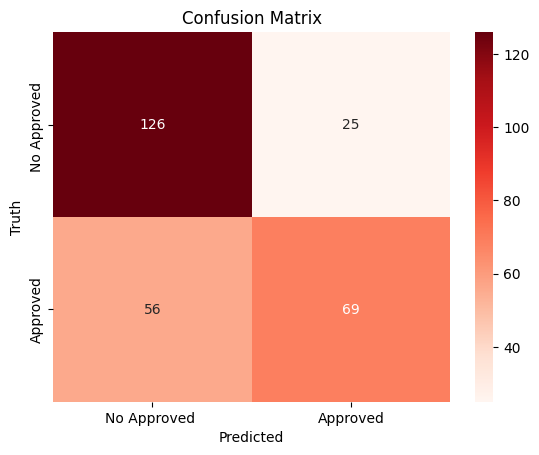

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Approved ", "Approved"], yticklabels=["No Approved ","Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.69      0.83      0.76       151
           1       0.73      0.55      0.63       125

    accuracy                           0.71       276
   macro avg       0.71      0.69      0.69       276
weighted avg       0.71      0.71      0.70       276



70-30

In [ ]:
model.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array(['0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

,Predicted,Actual
286,0,0
511,1,1
257,0,0
336,1,0
318,0,1
...,...,...
601,0,0
66,1,1
11,0,1
674,1,0


Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.6811594202898551

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[92, 18],
       [48, 49]])

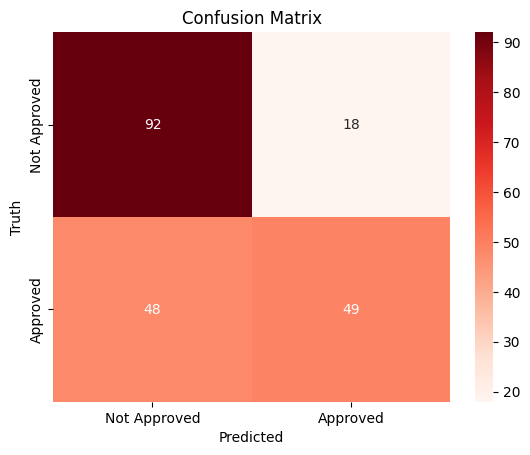

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       110
           1       0.73      0.51      0.60        97

    accuracy                           0.68       207
   macro avg       0.69      0.67      0.67       207
weighted avg       0.69      0.68      0.67       207



75-25

In [ ]:
model.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array(['0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1',
       '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1',
       '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0'], dtype=object)

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

,Predicted,Actual
286,0,0
511,1,1
257,0,0
336,0,0
318,0,1
...,...,...
357,0,0
215,0,1
629,0,0
390,0,0


Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.6647398843930635

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[78, 13],
       [45, 37]])

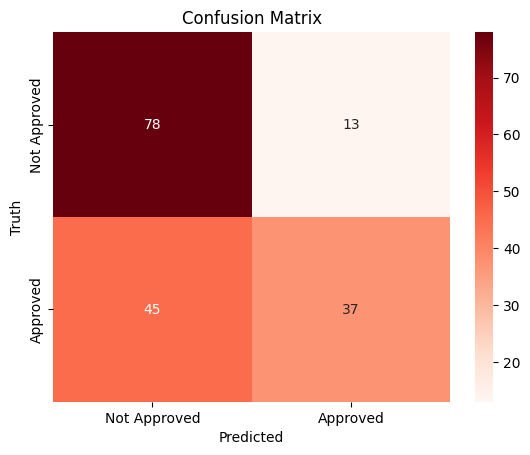

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.63      0.86      0.73        91
           1       0.74      0.45      0.56        82

    accuracy                           0.66       173
   macro avg       0.69      0.65      0.64       173
weighted avg       0.68      0.66      0.65       173



80-20

In [ ]:
model.fit(X_train4, y_train4)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array(['0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0',
       '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0',
       '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1',
       '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '1', '1', '0', '0', '0'], dtype=object)

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

,Predicted,Actual
286,0,0
511,1,1
257,0,0
336,0,0
318,0,1
...,...,...
333,1,0
507,1,1
24,0,1
158,0,1


Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.644927536231884

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[58, 10],
       [39, 31]])

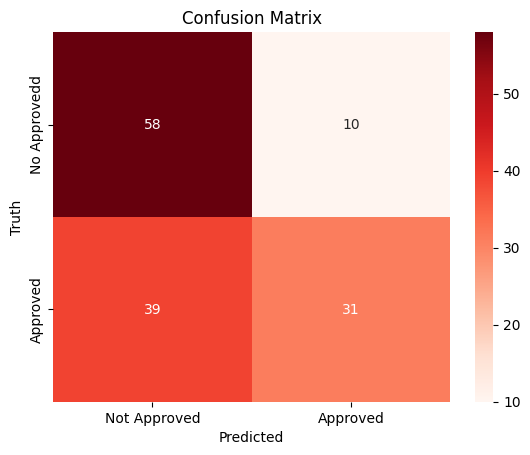

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Approved", "Approved"], yticklabels=["No Approvedd", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.60      0.85      0.70        68
           1       0.76      0.44      0.56        70

    accuracy                           0.64       138
   macro avg       0.68      0.65      0.63       138
weighted avg       0.68      0.64      0.63       138



# KNN after **VIF**

60-40

In [ ]:
model.fit(X_train1_nomulti, y_train1_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred1_nomulti = model.predict(X_test1_nomulti)
y_pred1_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred1_nomulti,'Actual':y_test1_nomulti})
knn

,Predicted,Actual
286,0,0
511,0,1
257,0,0
336,0,0
318,0,1
...,...,...
637,0,0
238,0,1
0,0,1
682,0,0


Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1_nomulti,y_pred1_nomulti)

0.7608695652173914

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1_nomulti,y_pred1_nomulti)
cm

array([[138,  13],
       [ 53,  72]])

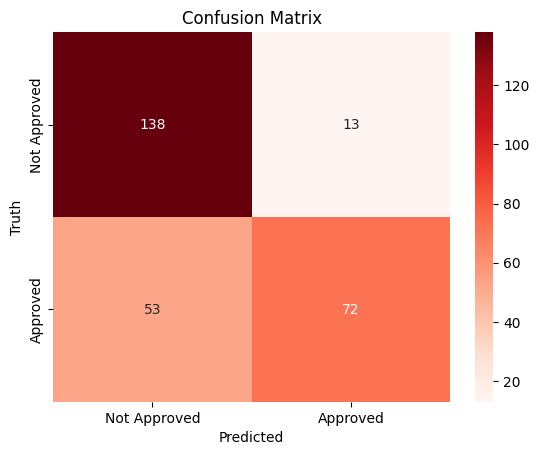

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [ ]:
classification_rep = classification_report(y_test1_nomulti, y_pred1_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.72      0.91      0.81       151
           1       0.85      0.58      0.69       125

    accuracy                           0.76       276
   macro avg       0.78      0.74      0.75       276
weighted avg       0.78      0.76      0.75       276



70-30

In [ ]:
model.fit(X_train2_nomulti, y_train2_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred2_nomulti = model.predict(X_test2_nomulti)
y_pred2_nomulti

array(['0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred2_nomulti,'Actual':y_test2_nomulti})
knn

,Predicted,Actual
286,0,0
511,0,1
257,0,0
336,0,0
318,0,1
...,...,...
601,0,0
66,1,1
11,0,1
674,0,0


Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2_nomulti,y_pred2_nomulti)

0.7439613526570048

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2_nomulti,y_pred2_nomulti)
cm

array([[103,   7],
       [ 46,  51]])

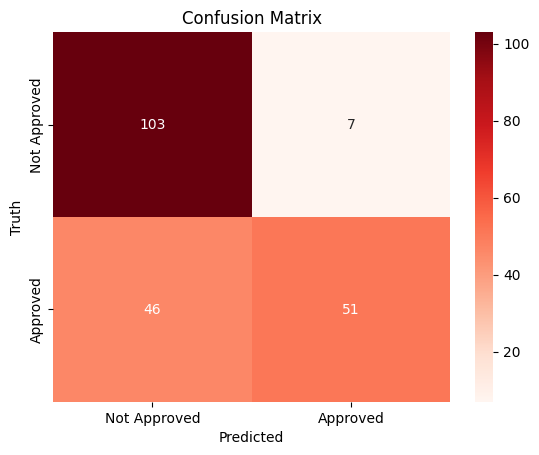

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2_nomulti, y_pred2_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.69      0.94      0.80       110
           1       0.88      0.53      0.66        97

    accuracy                           0.74       207
   macro avg       0.79      0.73      0.73       207
weighted avg       0.78      0.74      0.73       207



75-25

In [ ]:
model.fit(X_train3_nomulti, y_train3_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred3_nomulti = model.predict(X_test3_nomulti)
y_pred3_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0'], dtype=object)

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred3_nomulti,'Actual':y_test3_nomulti})
knn

,Predicted,Actual
286,0,0
511,0,1
257,0,0
336,0,0
318,0,1
...,...,...
357,0,0
215,0,1
629,0,0
390,0,0


Evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3_nomulti,y_pred3_nomulti)

0.7456647398843931

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3_nomulti,y_pred3_nomulti)
cm

array([[86,  5],
       [39, 43]])

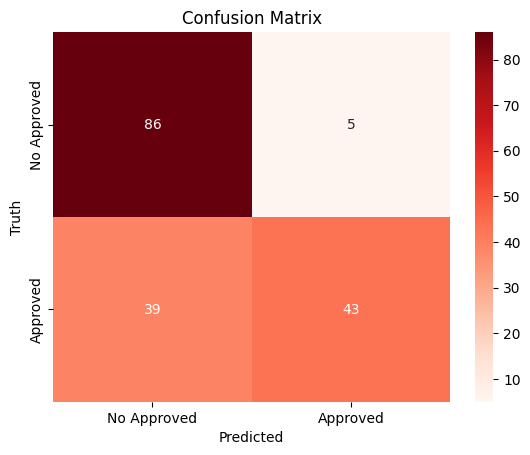

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Approved", "Approved"], yticklabels=["No Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3_nomulti, y_pred3_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        91
           1       0.90      0.52      0.66        82

    accuracy                           0.75       173
   macro avg       0.79      0.73      0.73       173
weighted avg       0.79      0.75      0.73       173



80-20

In [ ]:
model.fit(X_train4_nomulti, y_train4_nomulti)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred4_nomulti = model.predict(X_test4_nomulti)
y_pred4_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1',
       '0', '0', '0', '0', '1', '1', '1', '1'], dtype=object)

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred4_nomulti,'Actual':y_test4_nomulti})
knn

,Predicted,Actual
286,0,0
511,0,1
257,0,0
336,0,0
318,0,1
...,...,...
333,0,0
507,1,1
24,1,1
158,1,1


Evaluation Metric

In [ ]:
accuracy_score(y_test4_nomulti,y_pred4_nomulti)

0.717391304347826

In [ ]:
cm = confusion_matrix(y_test4_nomulti,y_pred4_nomulti)
cm

array([[63,  5],
       [34, 36]])

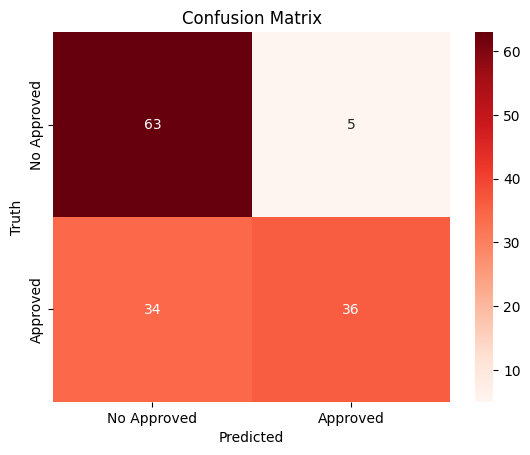

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Approved", "Approved"], yticklabels=["No Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# SVM before VIF

60-40

In [ ]:
from sklearn.svm import SVC

In [ ]:
model1 = SVC(kernel='linear')

In [ ]:
model1.fit(X_train1, y_train1)

SVC(kernel='linear')

In [ ]:
y_pred1 = model1.predict(X_test1)

In [ ]:
y_pred1

array(['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1',
       '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

,Predicted,Actual
286,0,0
511,1,1
257,0,0
336,0,0
318,0,1
...,...,...
637,0,0
238,1,1
0,1,1
682,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.8369565217391305

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[123,  28],
       [ 17, 108]])

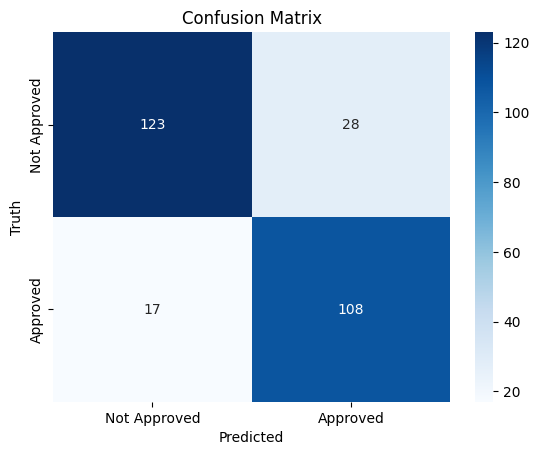

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       151
           1       0.79      0.86      0.83       125

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



70-30

In [ ]:
model1.fit(X_train2, y_train2)

SVC(kernel='linear')

In [ ]:
y_pred2 = model1.predict(X_test2)

In [ ]:
y_pred2

array(['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1',
       '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

,Predicted,Actual
286,0,0
511,1,1
257,0,0
336,0,0
318,0,1
...,...,...
601,0,0
66,1,1
11,1,1
674,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.8309178743961353

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[89, 21],
       [14, 83]])

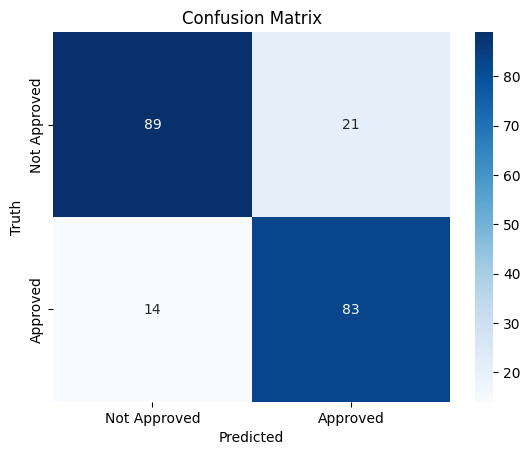

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       110
           1       0.80      0.86      0.83        97

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207



75-25

In [ ]:
model1.fit(X_train3, y_train3)

SVC(kernel='linear')

In [ ]:
y_pred3 = model1.predict(X_test3)

In [ ]:
y_pred3

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0',
       '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1',
       '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '0', '0'], dtype=object)

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

,Predicted,Actual
286,0,0
511,0,1
257,0,0
336,0,0
318,0,1
...,...,...
357,0,0
215,1,1
629,0,0
390,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.8208092485549133

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[76, 15],
       [16, 66]])

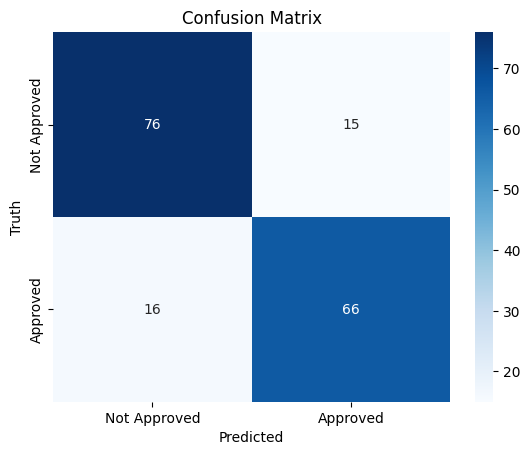

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        91
           1       0.81      0.80      0.81        82

    accuracy                           0.82       173
   macro avg       0.82      0.82      0.82       173
weighted avg       0.82      0.82      0.82       173



80-20

In [ ]:
model1.fit(X_train4, y_train4)

SVC(kernel='linear')

In [ ]:
y_pred4 = model1.predict(X_test4)

In [ ]:
y_pred4

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1',
       '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1',
       '1', '0', '1', '0', '1', '1', '1', '1'], dtype=object)

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

,Predicted,Actual
286,0,0
511,0,1
257,0,0
336,0,0
318,0,1
...,...,...
333,0,0
507,1,1
24,1,1
158,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.8043478260869565

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[54, 14],
       [13, 57]])

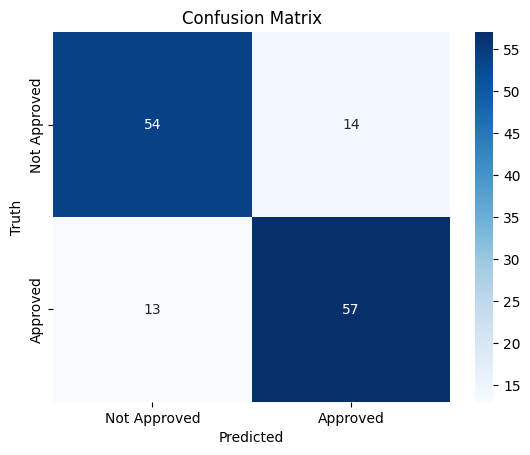

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        68
           1       0.80      0.81      0.81        70

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.80      0.80      0.80       138



# SVM after VIF

60-40

In [ ]:
model1 = SVC(kernel='linear')

In [ ]:
model1.fit(X_train1_nomulti, y_train1_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred1_nomulti = model1.predict(X_test1_nomulti)

In [ ]:
y_pred1_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1_nomulti,'Actual':y_test1_nomulti})
svm

,Predicted,Actual
286,0,0
511,0,1
257,0,0
336,0,0
318,0,1
...,...,...
637,0,0
238,0,1
0,0,1
682,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1_nomulti,y_pred1_nomulti)

0.7536231884057971

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1_nomulti,y_pred1_nomulti)
cm

array([[122,  29],
       [ 39,  86]])

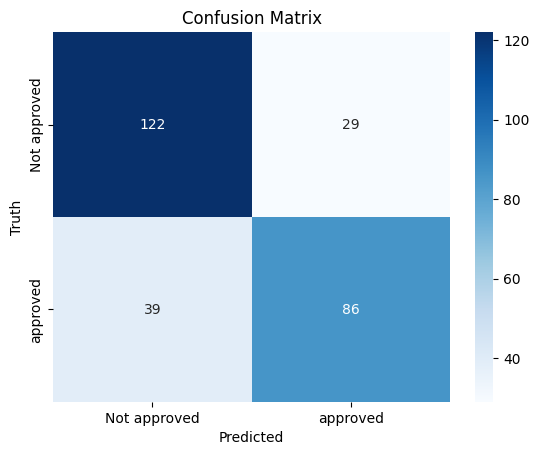

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not approved", "approved"], yticklabels=["Not approved", "approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1_nomulti, y_pred1_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       151
           1       0.75      0.69      0.72       125

    accuracy                           0.75       276
   macro avg       0.75      0.75      0.75       276
weighted avg       0.75      0.75      0.75       276



70-30

In [ ]:
model1.fit(X_train2_nomulti, y_train2_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred2_nomulti = model1.predict(X_test2_nomulti)

In [ ]:
y_pred2_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1',
       '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2_nomulti,'Actual':y_test2_nomulti})
svm

,Predicted,Actual
286,0,0
511,0,1
257,0,0
336,0,0
318,0,1
...,...,...
601,0,0
66,1,1
11,0,1
674,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2_nomulti,y_pred2_nomulti)

0.7681159420289855

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2_nomulti,y_pred2_nomulti)
cm

array([[93, 17],
       [31, 66]])

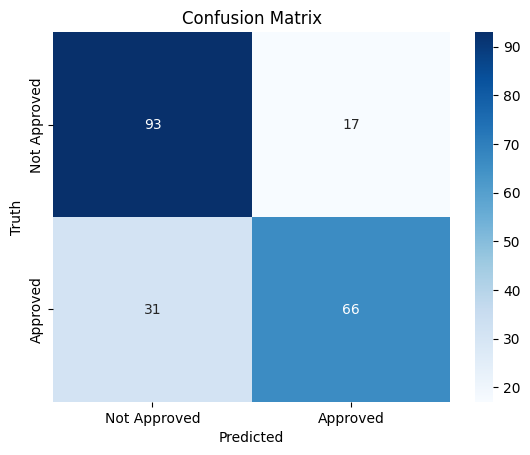

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2_nomulti, y_pred2_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       110
           1       0.80      0.68      0.73        97

    accuracy                           0.77       207
   macro avg       0.77      0.76      0.76       207
weighted avg       0.77      0.77      0.77       207



75-25

In [ ]:
model1.fit(X_train3_nomulti, y_train3_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred3_nomulti = model1.predict(X_test3_nomulti)

In [ ]:
y_pred3_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0'], dtype=object)

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3_nomulti,'Actual':y_test3_nomulti})
svm

,Predicted,Actual
286,0,0
511,0,1
257,0,0
336,0,0
318,0,1
...,...,...
357,0,0
215,0,1
629,0,0
390,0,0


In [ ]:
accuracy_score(y_test3_nomulti,y_pred3_nomulti)

0.7745664739884393

In [ ]:
cm = confusion_matrix(y_test3_nomulti,y_pred3_nomulti)
cm

array([[79, 12],
       [27, 55]])

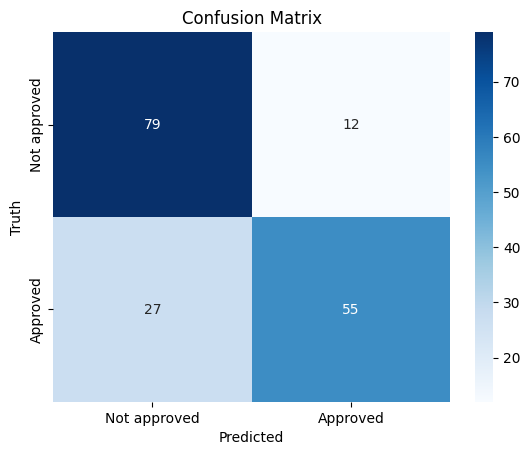

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not approved", "Approved"], yticklabels=["Not approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3_nomulti, y_pred3_nomulti)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        91
           1       0.82      0.67      0.74        82

    accuracy                           0.77       173
   macro avg       0.78      0.77      0.77       173
weighted avg       0.78      0.77      0.77       173



80-20

In [ ]:
model1.fit(X_train4_nomulti, y_train4_nomulti)

SVC(kernel='linear')

In [ ]:
y_pred4_nomulti = model1.predict(X_test4_nomulti)

In [ ]:
y_pred4_nomulti

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1',
       '0', '0', '0', '0', '1', '1', '1', '1'], dtype=object)

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4_nomulti,'Actual':y_test4_nomulti})
svm

,Predicted,Actual
286,0,0
511,0,1
257,0,0
336,0,0
318,0,1
...,...,...
333,0,0
507,1,1
24,1,1
158,1,1


In [ ]:
accuracy_score(y_test4_nomulti,y_pred4_nomulti)

0.717391304347826

In [ ]:
cm = confusion_matrix(y_test4_nomulti,y_pred4_nomulti)
cm

array([[63,  5],
       [34, 36]])

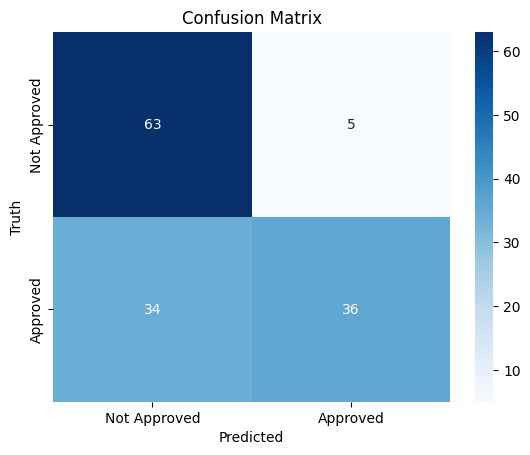

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test4_nomulti, y_pred4_nomulti)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.65      0.93      0.76        68
           1       0.88      0.51      0.65        70

    accuracy                           0.72       138
   macro avg       0.76      0.72      0.71       138
weighted avg       0.77      0.72      0.71       138



# Decision Trees before VIF

60-40

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train1,y_train1)

In [ ]:
y_pred1 = clf.predict(X_test1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8079710144927537


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8405797101449275


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8478260869565217


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8478260869565217


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train1,y_train1)
y_pred1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.7971014492753623


In [ ]:
#Predict the response for train dataset
y_pred_train1 = clf.predict(X_train1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train1, y_pred_train1))

Accuracy: 0.9468599033816425


70-30

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train2,y_train2)

In [ ]:
y_pred2 = clf.predict(X_test2)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8019323671497585


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8405797101449275


In [ ]:
clf =  DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8405797101449275


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8405797101449275


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train2,y_train2)
y_pred2 = clf.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8164251207729468


In [ ]:
#Predict the response for train dataset
y_pred_train2 = clf.predict(X_train2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train2, y_pred_train2))

Accuracy: 0.94824016563147


75-25

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train3,y_train3)

In [ ]:
y_pred3 = clf.predict(X_test3)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.7976878612716763


In [ ]:
clf =DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8439306358381503


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8439306358381503


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8439306358381503


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train3,y_train3)
y_pred3 = clf.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8034682080924855


In [ ]:
#Predict the response for train dataset
y_pred_train3 = clf.predict(X_train3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train3, y_pred_train3))

Accuracy: 0.9361702127659575


80-20

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train4,y_train4)

In [ ]:
y_pred4 = clf.predict(X_test4)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.7753623188405797


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.8260869565217391


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.8260869565217391


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.7536231884057971


In [ ]:
clf =  DecisionTreeClassifier(criterion="gini", max_depth=6)
clf = clf.fit(X_train4,y_train4)
y_pred4 = clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.7681159420289855


In [ ]:
#Predict the response for train dataset
y_pred_train4 = clf.predict(X_train4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train4, y_pred_train4))

Accuracy: 0.9311594202898551


# DecisionTree after VIF

60-40

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train1_nomulti,y_train1_nomulti)

In [ ]:
y_pred1_nomulti = clf.predict(X_test1_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.6956521739130435


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1_nomulti = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.75


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1_nomulti = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.7463768115942029


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1_nomulti = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.75


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train1_nomulti,y_train1_nomulti)

#Predict the response for test dataset
y_pred1_nomulti = clf.predict(X_test1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.717391304347826


In [ ]:
#Predict the response for train dataset
y_pred_train1_nomulti = clf.predict(X_train1_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train1_nomulti, y_pred_train1_nomulti))

Accuracy: 0.8647342995169082


70-30

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train2_nomulti,y_train2_nomulti)

In [ ]:
y_pred2_nomulti = clf.predict(X_test2_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.6859903381642513


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2_nomulti = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.714975845410628


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2_nomulti = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.7342995169082126


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2_nomulti = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.748792270531401


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train2_nomulti,y_train2_nomulti)

#Predict the response for test dataset
y_pred2_nomulti = clf.predict(X_test2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.6859903381642513


In [ ]:
#Predict the response for train dataset
y_pred_train2_nomulti = clf.predict(X_train2_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train2_nomulti, y_pred_train2_nomulti))

Accuracy: 0.8695652173913043


75-25

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train3_nomulti,y_train3_nomulti)

In [ ]:
y_pred3_nomulti = clf.predict(X_test3_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.6936416184971098


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3_nomulti = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7398843930635838


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3_nomulti = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7398843930635838


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3_nomulti = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7456647398843931


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train3_nomulti,y_train3_nomulti)

#Predict the response for test dataset
y_pred3_nomulti = clf.predict(X_test3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7167630057803468


In [ ]:
#Predict the response for train dataset
y_pred_train3_nomulti = clf.predict(X_train3_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train3_nomulti, y_pred_train3_nomulti))

Accuracy: 0.8568665377176016


80-20

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train4_nomulti,y_train4_nomulti)

In [ ]:
y_pred4_nomulti = clf.predict(X_test4_nomulti)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.6739130434782609


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4_nomulti = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.7246376811594203


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4_nomulti = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.7246376811594203


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4_nomulti = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.7246376811594203


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train4_nomulti,y_train4_nomulti)

#Predict the response for test dataset
y_pred4_nomulti = clf.predict(X_test4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.6739130434782609


In [ ]:
#Predict the response for train dataset
y_pred_train4_nomulti = clf.predict(X_train4_nomulti)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train4_nomulti, y_pred_train4_nomulti))

Accuracy: 0.8659420289855072


# RANDOM FOREST

60-40

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train1,y_train1)

RandomForestClassifier()

In [ ]:
y_pred1=rf.predict(X_test1)
print("Accuracy:",accuracy_score(y_test1,y_pred1))

Accuracy: 0.8659420289855072


In [ ]:
print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       151
           1       0.85      0.86      0.85       125

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

[[132  19]
 [ 18 107]]


70-30

In [ ]:
rf.fit(X_train2,y_train2)

RandomForestClassifier()

In [ ]:
y_pred2=rf.predict(X_test2)
print("Accuracy:",accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

Accuracy: 0.8502415458937198
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.84      0.84      0.84        97

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

[[95 15]
 [16 81]]


75-25

In [ ]:
rf.fit(X_train3,y_train3)

RandomForestClassifier()

In [ ]:
y_pred3=rf.predict(X_test3)
print("Accuracy:",accuracy_score(y_test3,y_pred3))
print(classification_report(y_test3, y_pred3))
print(confusion_matrix(y_test3, y_pred3))

Accuracy: 0.8497109826589595
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        91
           1       0.88      0.79      0.83        82

    accuracy                           0.85       173
   macro avg       0.85      0.85      0.85       173
weighted avg       0.85      0.85      0.85       173

[[82  9]
 [17 65]]


80-20

In [ ]:
rf.fit(X_train4,y_train4)

RandomForestClassifier()

In [ ]:
y_pred4=rf.predict(X_test4)
print("Accuracy:",accuracy_score(y_test4,y_pred4))
print(classification_report(y_test4, y_pred4))
print(confusion_matrix(y_test4, y_pred4))

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        68
           1       0.86      0.80      0.83        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138

[[59  9]
 [14 56]]


# RANDOM FOREST AFTER VIF

60-40

In [ ]:
rf.fit(X_train1_nomulti,y_train1_nomulti)

RandomForestClassifier()

In [ ]:
y_pred_train1_nomulti=rf.predict(X_test1_nomulti)
print("Accuracy:",accuracy_score(y_test1_nomulti,y_pred1_nomulti))
print(classification_report(y_test1_nomulti, y_pred1_nomulti))
print(confusion_matrix(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.717391304347826
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       151
           1       0.70      0.65      0.68       125

    accuracy                           0.72       276
   macro avg       0.72      0.71      0.71       276
weighted avg       0.72      0.72      0.72       276

[[117  34]
 [ 44  81]]


70-30

In [ ]:
rf.fit(X_train2_nomulti,y_train2_nomulti)

RandomForestClassifier()

In [ ]:
y_pred_train2_nomulti=rf.predict(X_test2_nomulti)
print("Accuracy:",accuracy_score(y_test2_nomulti,y_pred2_nomulti))
print(classification_report(y_test2_nomulti, y_pred2_nomulti))
print(confusion_matrix(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.6859903381642513
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       110
           1       0.71      0.56      0.62        97

    accuracy                           0.69       207
   macro avg       0.69      0.68      0.68       207
weighted avg       0.69      0.69      0.68       207

[[88 22]
 [43 54]]


75-25

In [ ]:
rf.fit(X_train3_nomulti,y_train3_nomulti)

RandomForestClassifier()

In [ ]:
y_pred_train3_nomulti=rf.predict(X_test3_nomulti)
print("Accuracy:",accuracy_score(y_test3_nomulti,y_pred3_nomulti))
print(classification_report(y_test3_nomulti, y_pred3_nomulti))
print(confusion_matrix(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7167630057803468
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        91
           1       0.76      0.59      0.66        82

    accuracy                           0.72       173
   macro avg       0.73      0.71      0.71       173
weighted avg       0.72      0.72      0.71       173

[[76 15]
 [34 48]]


80-20

In [ ]:
rf.fit(X_train4_nomulti,y_train4_nomulti)

RandomForestClassifier()

In [ ]:
y_pred_train4_nomulti=rf.predict(X_test4_nomulti)
print("Accuracy:",accuracy_score(y_test4_nomulti,y_pred4_nomulti))
print(classification_report(y_test4_nomulti, y_pred4_nomulti))
print(confusion_matrix(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.6739130434782609
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        68
           1       0.73      0.57      0.64        70

    accuracy                           0.67       138
   macro avg       0.68      0.68      0.67       138
weighted avg       0.68      0.67      0.67       138

[[53 15]
 [30 40]]


# ADABOOST BEFORE VIF

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Replace 'base_estimator' with 'estimator'
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=0)
adaboost = AdaBoostClassifier(estimator=base_estimator, # Changed argument name here
                              n_estimators=3,random_state=0)

60-40

In [ ]:
adaboost.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred1 = adaboost.predict(X_test1)
print("Accuracy:",accuracy_score(y_test1,y_pred1))
print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))

Accuracy: 0.8152173913043478
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       151
           1       0.81      0.77      0.79       125

    accuracy                           0.82       276
   macro avg       0.82      0.81      0.81       276
weighted avg       0.82      0.82      0.81       276

[[129  22]
 [ 29  96]]


70-30

In [ ]:
adaboost.fit(X_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred2 = adaboost.predict(X_test2)
print("Accuracy:",accuracy_score(y_test2,y_pred2))
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

Accuracy: 0.821256038647343
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       110
           1       0.79      0.84      0.81        97

    accuracy                           0.82       207
   macro avg       0.82      0.82      0.82       207
weighted avg       0.82      0.82      0.82       207

[[89 21]
 [16 81]]


75-25

In [ ]:
adaboost.fit(X_train3, y_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred3 = adaboost.predict(X_test3)
print("Accuracy:",accuracy_score(y_test3,y_pred3))
print(classification_report(y_test3, y_pred3))
print(confusion_matrix(y_test3, y_pred3))

Accuracy: 0.8034682080924855
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        91
           1       0.79      0.79      0.79        82

    accuracy                           0.80       173
   macro avg       0.80      0.80      0.80       173
weighted avg       0.80      0.80      0.80       173

[[74 17]
 [17 65]]


80-20

In [ ]:
adaboost.fit(X_train4, y_train4)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred4 = adaboost.predict(X_test4)
print("Accuracy:",accuracy_score(y_test4,y_pred4))
print(classification_report(y_test4, y_pred4))
print(confusion_matrix(y_test4, y_pred4))

Accuracy: 0.782608695652174
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        68
           1       0.79      0.77      0.78        70

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.78      0.78      0.78       138

[[54 14]
 [16 54]]


# ADABOOST AFTER VIF

60-40

In [ ]:
adaboost.fit(X_train1_nomulti, y_train1_nomulti)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred1_nomulti = adaboost.predict(X_test1_nomulti)
print("Accuracy:",accuracy_score(y_test1_nomulti,y_pred1_nomulti))
print(classification_report(y_test1_nomulti, y_pred1_nomulti))
print(confusion_matrix(y_test1_nomulti, y_pred1_nomulti))

Accuracy: 0.7137681159420289
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       151
           1       0.69      0.66      0.67       125

    accuracy                           0.71       276
   macro avg       0.71      0.71      0.71       276
weighted avg       0.71      0.71      0.71       276

[[115  36]
 [ 43  82]]


70-30

In [ ]:
adaboost.fit(X_train2_nomulti, y_train2_nomulti)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred2_nomulti = adaboost.predict(X_test2_nomulti)
print("Accuracy:",accuracy_score(y_test2_nomulti,y_pred2_nomulti))
print(classification_report(y_test2_nomulti, y_pred2_nomulti))
print(confusion_matrix(y_test2_nomulti, y_pred2_nomulti))

Accuracy: 0.7584541062801933
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       110
           1       0.76      0.70      0.73        97

    accuracy                           0.76       207
   macro avg       0.76      0.76      0.76       207
weighted avg       0.76      0.76      0.76       207

[[89 21]
 [29 68]]


75-25

In [ ]:
adaboost.fit(X_train3_nomulti, y_train3_nomulti)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred3_nomulti = adaboost.predict(X_test3_nomulti)
print("Accuracy:",accuracy_score(y_test3_nomulti,y_pred3_nomulti))
print(classification_report(y_test3_nomulti, y_pred3_nomulti))
print(confusion_matrix(y_test3_nomulti, y_pred3_nomulti))

Accuracy: 0.7341040462427746
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        91
           1       0.76      0.65      0.70        82

    accuracy                           0.73       173
   macro avg       0.74      0.73      0.73       173
weighted avg       0.74      0.73      0.73       173

[[74 17]
 [29 53]]


80-20

In [ ]:
adaboost.fit(X_train4_nomulti, y_train4_nomulti)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

In [ ]:
y_pred4_nomulti = adaboost.predict(X_test4_nomulti)
print("Accuracy:",accuracy_score(y_test4_nomulti,y_pred4_nomulti))
print(classification_report(y_test4_nomulti, y_pred4_nomulti))
print(confusion_matrix(y_test4_nomulti, y_pred4_nomulti))

Accuracy: 0.7463768115942029
              precision    recall  f1-score   support

           0       0.70      0.84      0.77        68
           1       0.81      0.66      0.72        70

    accuracy                           0.75       138
   macro avg       0.76      0.75      0.74       138
weighted avg       0.76      0.75      0.74       138

[[57 11]
 [24 46]]


# XGBOOT BEFORE VIF

In [ ]:
import xgboost as xgb

In [ ]:
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

In [ ]:
y_train1 = y_train1.astype('int')
y_train2 = y_train2.astype('int')
y_train3 = y_train3.astype('int')
y_train4 = y_train4.astype('int')
y_test1= y_test1.astype('int')
y_test2= y_test2.astype('int')
y_test3= y_test3.astype('int')
y_test4= y_test4.astype('int')

60-40

In [ ]:
model1.fit(X_train1, y_train1)
model2.fit(X_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1 = model1.predict(X_test1)
pred2 = model2.predict(X_test1)

print('Model 1 XGboost Report %r' % (classification_report(y_test1, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test1, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86       151\n           1       0.82      0.86      0.84       125\n\n    accuracy                           0.85       276\n   macro avg       0.85      0.85      0.85       276\nweighted avg       0.85      0.85      0.85       276\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.89      0.84      0.87       151\n           1       0.82      0.88      0.85       125\n\n    accuracy                           0.86       276\n   macro avg       0.86      0.86      0.86       276\nweighted avg       0.86      0.86      0.86       276\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test1, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test1, pred2) * 100))
print(confusion_matrix(y_test1, pred1))
print(confusion_matrix(y_test1, pred2))

Accuracy for model 1: 84.78
Accuracy for model 2: 85.87
[[127  24]
 [ 18 107]]
[[127  24]
 [ 15 110]]


70-30

In [ ]:
model1.fit(X_train2, y_train2)
model2.fit(X_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1 = model1.predict(X_test2)
pred2 = model2.predict(X_test2)

print('Model 1 XGboost Report %r' % (classification_report(y_test2, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test2, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.83      0.85      0.84       110\n           1       0.82      0.80      0.81        97\n\n    accuracy                           0.83       207\n   macro avg       0.83      0.82      0.83       207\nweighted avg       0.83      0.83      0.83       207\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.85      0.85      0.85       110\n           1       0.83      0.84      0.83        97\n\n    accuracy                           0.84       207\n   macro avg       0.84      0.84      0.84       207\nweighted avg       0.84      0.84      0.84       207\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test2, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test2, pred2) * 100))
print(confusion_matrix(y_test2, pred1))
print(confusion_matrix(y_test2, pred2))

Accuracy for model 1: 82.61
Accuracy for model 2: 84.06
[[93 17]
 [19 78]]
[[93 17]
 [16 81]]


75-25

In [ ]:
model1.fit(X_train3, y_train3)
model2.fit(X_train3,y_train3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1 = model1.predict(X_test3)
pred2 = model2.predict(X_test3)

print('Model 1 XGboost Report %r' % (classification_report(y_test3, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test3, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85        91\n           1       0.86      0.79      0.82        82\n\n    accuracy                           0.84       173\n   macro avg       0.84      0.84      0.84       173\nweighted avg       0.84      0.84      0.84       173\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.85      0.90      0.87        91\n           1       0.88      0.82      0.85        82\n\n    accuracy                           0.86       173\n   macro avg       0.86      0.86      0.86       173\nweighted avg       0.86      0.86      0.86       173\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test3, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test3, pred2) * 100))
print(confusion_matrix(y_test3, pred1))
print(confusion_matrix(y_test3, pred2))

Accuracy for model 1: 83.82
Accuracy for model 2: 86.13
[[80 11]
 [17 65]]
[[82  9]
 [15 67]]


80-20

In [ ]:
model1.fit(X_train4, y_train4)
model2.fit(X_train4,y_train4)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1 = model1.predict(X_test4)
pred2 = model2.predict(X_test4)

print('Model 1 XGboost Report %r' % (classification_report(y_test4, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test4, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.80      0.84      0.82        68\n           1       0.84      0.80      0.82        70\n\n    accuracy                           0.82       138\n   macro avg       0.82      0.82      0.82       138\nweighted avg       0.82      0.82      0.82       138\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.79      0.85      0.82        68\n           1       0.85      0.79      0.81        70\n\n    accuracy                           0.82       138\n   macro avg       0.82      0.82      0.82       138\nweighted avg       0.82      0.82      0.82       138\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test4, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test4, pred2) * 100))
print(confusion_matrix(y_test4, pred1))
print(confusion_matrix(y_test4, pred2))

Accuracy for model 1: 81.88
Accuracy for model 2: 81.88
[[57 11]
 [14 56]]
[[58 10]
 [15 55]]


# XGBoost After Vif

In [ ]:
y_train1_nomulti = y_train1_nomulti.astype('int')
y_train2_nomulti = y_train2_nomulti.astype('int')
y_train3_nomulti = y_train3_nomulti.astype('int')
y_train4_nomulti = y_train4_nomulti.astype('int')
y_test1_nomulti = y_test1_nomulti.astype('int')
y_test2_nomulti = y_test2_nomulti.astype('int')
y_test3_nomulti = y_test3_nomulti.astype('int')
y_test4_nomulti = y_test4_nomulti.astype('int')

60-40

In [ ]:
model1.fit(X_train1_nomulti, y_train1_nomulti)
model2.fit(X_train1_nomulti,y_train1_nomulti)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1_nomulti = model1.predict(X_test1_nomulti)
pred2_nomulti = model2.predict(X_test1_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test1_nomulti, pred1_nomulti)))
print('Model 2 XGboost Report %r' % (classification_report(y_test1_nomulti, pred2_nomulti)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.75      0.73      0.74       151\n           1       0.68      0.70      0.69       125\n\n    accuracy                           0.72       276\n   macro avg       0.72      0.72      0.72       276\nweighted avg       0.72      0.72      0.72       276\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.80       151\n           1       0.76      0.75      0.76       125\n\n    accuracy                           0.78       276\n   macro avg       0.78      0.78      0.78       276\nweighted avg       0.78      0.78      0.78       276\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test1_nomulti, pred1_nomulti) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test1_nomulti, pred2_nomulti) * 100))
print(confusion_matrix(y_test1_nomulti, pred1_nomulti))
print(confusion_matrix(y_test1_nomulti, pred2_nomulti))

Accuracy for model 1: 71.74
Accuracy for model 2: 78.26
[[110  41]
 [ 37  88]]
[[122  29]
 [ 31  94]]


70-30

In [ ]:
model1.fit(X_train2_nomulti, y_train2_nomulti)
model2.fit(X_train2_nomulti,y_train2_nomulti)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1_nomulti = model1.predict(X_test2_nomulti)
pred2_nomulti = model2.predict(X_test2_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test2_nomulti, pred1_nomulti)))
print('Model 2 XGboost Report %r' % (classification_report(y_test2_nomulti, pred2_nomulti)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.73      0.77      0.75       110\n           1       0.72      0.67      0.70        97\n\n    accuracy                           0.72       207\n   macro avg       0.72      0.72      0.72       207\nweighted avg       0.72      0.72      0.72       207\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.74      0.82      0.78       110\n           1       0.77      0.68      0.72        97\n\n    accuracy                           0.75       207\n   macro avg       0.76      0.75      0.75       207\nweighted avg       0.75      0.75      0.75       207\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test2_nomulti, pred1_nomulti) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test2_nomulti, pred2_nomulti) * 100))
print(confusion_matrix(y_test2_nomulti, pred1_nomulti))
print(confusion_matrix(y_test2_nomulti, pred2_nomulti))

Accuracy for model 1: 72.46
Accuracy for model 2: 75.36
[[85 25]
 [32 65]]
[[90 20]
 [31 66]]


75-25

In [ ]:
model1.fit(X_train3_nomulti, y_train3_nomulti)
model2.fit(X_train3_nomulti,y_train3_nomulti)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1_nomulti = model1.predict(X_test3_nomulti)
pred2_nomulti = model2.predict(X_test3_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test3_nomulti, pred1_nomulti)))
print('Model 2 XGboost Report %r' % (classification_report(y_test3_nomulti, pred2_nomulti)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.75      0.75      0.75        91\n           1       0.72      0.72      0.72        82\n\n    accuracy                           0.73       173\n   macro avg       0.73      0.73      0.73       173\nweighted avg       0.73      0.73      0.73       173\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.77      0.84      0.80        91\n           1       0.80      0.72      0.76        82\n\n    accuracy                           0.78       173\n   macro avg       0.78      0.78      0.78       173\nweighted avg       0.78      0.78      0.78       173\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test3_nomulti, pred1_nomulti) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test3_nomulti, pred2_nomulti) * 100))
print(confusion_matrix(y_test3_nomulti, pred1_nomulti))
print(confusion_matrix(y_test3_nomulti, pred2_nomulti))

Accuracy for model 1: 73.41
Accuracy for model 2: 78.03
[[68 23]
 [23 59]]
[[76 15]
 [23 59]]


80-20

In [ ]:
model1.fit(X_train4_nomulti, y_train4)
model2.fit(X_train4_nomulti,y_train4)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred1_nomulti = model1.predict(X_test4_nomulti)
pred2_nomulti = model2.predict(X_test4_nomulti)

print('Model 1 XGboost Report %r' % (classification_report(y_test4_nomulti, pred1_nomulti)))
print('Model 2 XGboost Report %r' % (classification_report(y_test4_nomulti, pred2_nomulti)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.66      0.69      0.68        68\n           1       0.69      0.66      0.67        70\n\n    accuracy                           0.67       138\n   macro avg       0.67      0.67      0.67       138\nweighted avg       0.67      0.67      0.67       138\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.73      0.79      0.76        68\n           1       0.78      0.71      0.75        70\n\n    accuracy                           0.75       138\n   macro avg       0.76      0.75      0.75       138\nweighted avg       0.76      0.75      0.75       138\n'


In [ ]:
print("Accuracy for model 1: %.2f" % (accuracy_score(y_test4_nomulti, pred1_nomulti) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test4_nomulti, pred2_nomulti) * 100))
print(confusion_matrix(y_test4_nomulti, pred1_nomulti))
print(confusion_matrix(y_test4_nomulti, pred2_nomulti))

Accuracy for model 1: 67.39
Accuracy for model 2: 75.36
[[47 21]
 [24 46]]
[[54 14]
 [20 50]]


# Neural Networks: ANN

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Convert 'Approved' column to numeric
y = pd.to_numeric(y, errors='coerce')

# Convert all columns in X to numeric
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.40, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train4 ,X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.20, random_state=42)

60-40

Before VIF

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model1.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP3: Fit the model

history1= model1.fit(X_train1, y_train1, epochs= 150)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5671 - loss: 17.4130 - precision: 0.3923 - recall: 0.0807
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6010 - loss: 1.6047 - precision: 0.5515 - recall: 0.6752
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6846 - loss: 1.5115 - precision: 0.6705 - recall: 0.6057
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6348 - loss: 0.8097 - precision: 0.7741 - recall: 0.2792
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6729 - loss: 0.8368 - precision: 0.7608 - recall: 0.4172
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6489 - loss: 0.7469 - precision: 0.7825 - recall: 0.3215
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6677 - loss: 0.7468 - precision: 0.8040 - recall: 0.3701
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6551 - loss: 0.6904 - precision: 0.7708 - recall: 0.3506
Epoch 9/150
13/13 

In [ ]:
# Evaluate the model on the test data
test_results1 = model1.evaluate(X_test1, y_test1, verbose=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7698 - loss: 0.5100 - precision: 0.7766 - recall: 0.6994  


<Axes: >

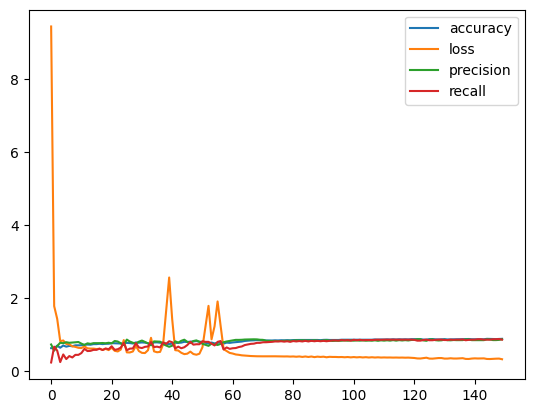

In [ ]:
pd.DataFrame(history1.history).plot()

After VIF

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model
model2= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model2.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP3: Fit the model

history2= model2.fit(X_train1_nomulti, y_train1_nomulti, epochs= 150)

Epoch 1/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4938 - loss: 0.6950 - precision: 0.4738 - recall: 0.9867
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6039 - loss: 0.6334 - precision: 0.5449 - recall: 0.8025 
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7006 - loss: 0.6037 - precision: 0.6575 - recall: 0.7210 
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7320 - loss: 0.5808 - precision: 0.6959 - recall: 0.7346
Epoch 5/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7343 - loss: 0.5650 - precision: 0.7095 - recall: 0.7095
Epoch 6/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7420 - loss: 0.5536 - precision: 0.7275 - recall: 0.6976 
Epoch 7/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7510 - loss: 0.5426 - precision: 0.7442 - recall: 0.6948 
Epoch 8/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7549 - loss: 0.5327 - precision: 0.7494 - recall: 0.6980 
Epoch 9/150
13/13 ━

In [ ]:
# Evaluate the model on the test data
test_results2 = model2.evaluate(X_test1_nomulti, y_test1_nomulti, verbose=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7204 - loss: 1.4583 - precision: 0.6986 - recall: 0.6772  


<Axes: >

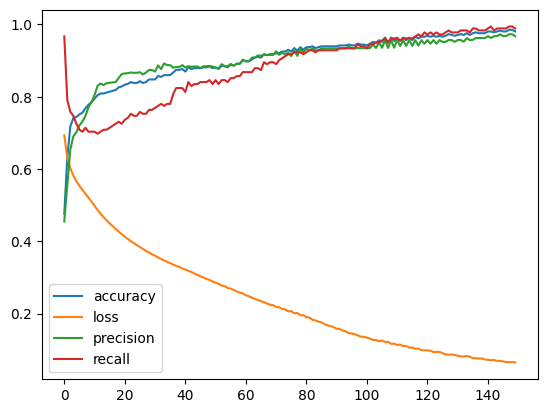

In [ ]:
pd.DataFrame(history2.history).plot()

70-30

Before VIF

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model3= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model3.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP3: Fit the model

history3= model3.fit(X_train2, y_train2, epochs= 150)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6737 - loss: 0.9759 - precision: 0.6436 - recall: 0.5110
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - loss: 0.8102 - precision: 0.5996 - recall: 0.7653 
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6563 - loss: 0.9828 - precision: 0.5882 - recall: 0.4657         
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7231 - loss: 0.6326 - precision: 0.7113 - recall: 0.5853 
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7523 - loss: 0.5570 - precision: 0.7419 - recall: 0.6386 
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7399 - loss: 0.6190 - precision: 0.6933 - recall: 0.6961 
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7420 - loss: 0.6669 - precision: 0.6799 - recall: 0.7395 
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7446 - loss: 0.6695 - precision: 0.6915 - recall: 0.7178 
Epoch 9/1

In [ ]:
# Evaluate the model on the test data
test_results3 = model3.evaluate(X_test2, y_test2, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7852 - loss: 0.7827 - precision: 0.7753 - recall: 0.7583  


<Axes: >

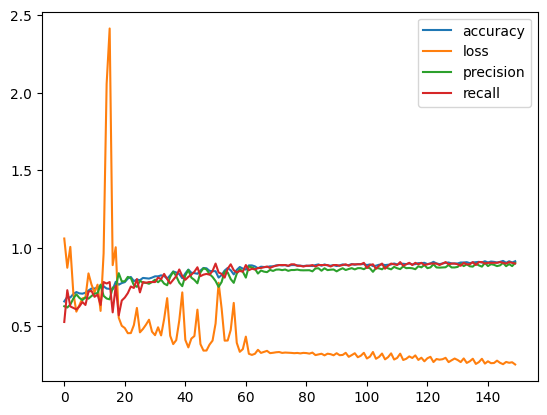

In [ ]:
pd.DataFrame(history3.history).plot()

 After VIF

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model4= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model4.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP3: Fit the model

history4= model4.fit(X_train2_nomulti, y_train2_nomulti, epochs= 150)

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5796 - loss: 0.7590 - precision: 0.5202 - recall: 0.0564        
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - loss: 0.6614 - precision: 0.6032 - recall: 0.4972 
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6669 - loss: 0.6284 - precision: 0.5842 - recall: 0.7412 
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - loss: 0.6108 - precision: 0.6177 - recall: 0.6907 
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.5925 - precision: 0.6569 - recall: 0.6634  
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7599 - loss: 0.5758 - precision: 0.7195 - recall: 0.7092  
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7599 - loss: 0.5564 - precision: 0.7336 - recall: 0.6786  
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7716 - loss: 0.5381 - precision: 0.7592 - recall: 0.6750 
Epoch 

In [ ]:
# Evaluate the model on the test data
test_results4 = model4.evaluate(X_test2_nomulti, y_test2_nomulti, verbose=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7318 - loss: 1.5817 - precision: 0.7167 - recall: 0.6919  


<Axes: >

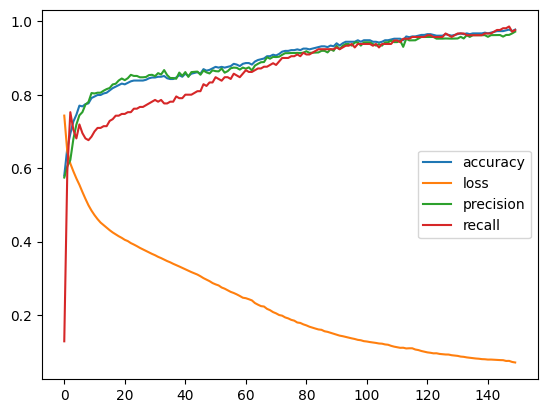

In [ ]:
pd.DataFrame(history4.history).plot()

75-25

Before VIF

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model5= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model5.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP3: Fit the model

history5= model5.fit(X_train3, y_train3, epochs= 150)

Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6000 - loss: 3.1569 - precision: 0.5429 - recall: 0.4942
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6379 - loss: 4.0936 - precision: 0.5699 - recall: 0.6686 
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6876 - loss: 2.1933 - precision: 0.6638 - recall: 0.5602  
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6895 - loss: 0.8533 - precision: 0.6901 - recall: 0.5085 
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7037 - loss: 0.7361 - precision: 0.7061 - recall: 0.5368 
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7100 - loss: 0.7059 - precision: 0.7067 - recall: 0.5565 
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 1.2863 - precision: 0.6879 - recall: 0.5957 
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6969 - loss: 5.3005 - precision: 0.6300 - recall: 0.7219 
Epoch 9/150
17/1

In [ ]:
# Evaluate the model on the test data
test_results5 = model5.evaluate(X_test3, y_test3, verbose=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7676 - loss: 0.8678 - precision: 0.8062 - recall: 0.6760 


<Axes: >

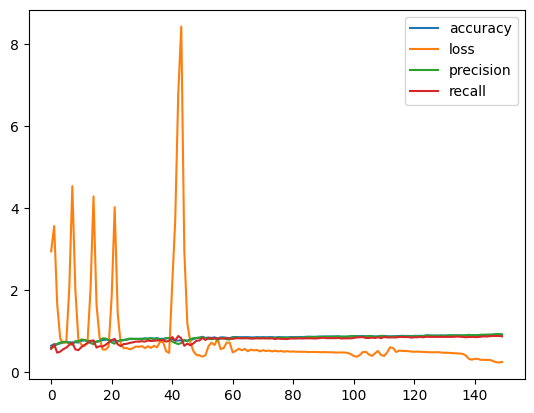

In [ ]:
pd.DataFrame(history5.history).plot()

After VIF

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model6= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model6.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP3: Fit the model

history6= model6.fit(X_train3_nomulti, y_train3_nomulti, epochs= 150)

Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4755 - loss: 0.7369 - precision: 0.4487 - recall: 0.9503
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6541 - loss: 0.6085 - precision: 0.5718 - recall: 0.7967
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7439 - loss: 0.5763 - precision: 0.7336 - recall: 0.6359 
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7600 - loss: 0.5550 - precision: 0.7636 - recall: 0.6421 
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7698 - loss: 0.5388 - precision: 0.7861 - recall: 0.6392
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7676 - loss: 0.5241 - precision: 0.7928 - recall: 0.6244
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7787 - loss: 0.5091 - precision: 0.8195 - recall: 0.6246
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7789 - loss: 0.4959 - precision: 0.8154 - recall: 0.6304
Epoch 9/150
17/17 ━━━━

In [ ]:
# Evaluate the model on the test data
test_results6 = model6.evaluate(X_test3_nomulti, y_test3_nomulti, verbose=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6827 - loss: 1.5758 - precision: 0.6665 - recall: 0.6329  


<Axes: >

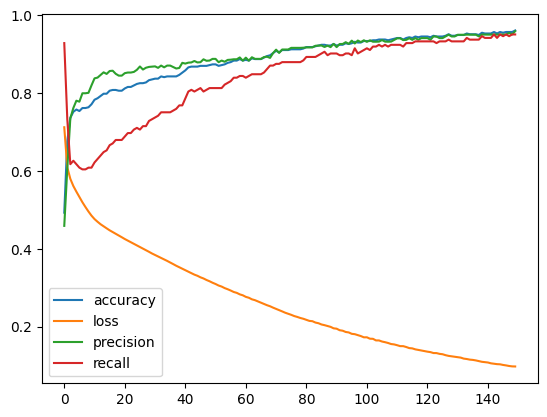

In [ ]:
pd.DataFrame(history6.history).plot()

80-20

Before VIF

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model7= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model7.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP3: Fit the model

history7= model7.fit(X_train4, y_train4, epochs= 150)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5698 - loss: 126.5614 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4891 - loss: 10.5425 - precision: 0.3338 - recall: 0.3537
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5332 - loss: 5.8178 - precision: 0.4758 - recall: 0.7616
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6246 - loss: 5.3378 - precision: 0.5592 - recall: 0.6095 
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6503 - loss: 2.4263 - precision: 0.6023 - recall: 0.5596
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6773 - loss: 0.9125 - precision: 0.6304 - recall: 0.6066
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6795 - loss: 0.8505 - precision: 0.7178 - recall: 0.4562
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.7094 - precision: 0.6805 - recall: 0.5300 
Epoch 9/150

In [ ]:
# Evaluate the model on the test data
test_results7 = model7.evaluate(X_test4, y_test4, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7777 - loss: 1.0747 - precision: 0.7898 - recall: 0.7304  


<Axes: >

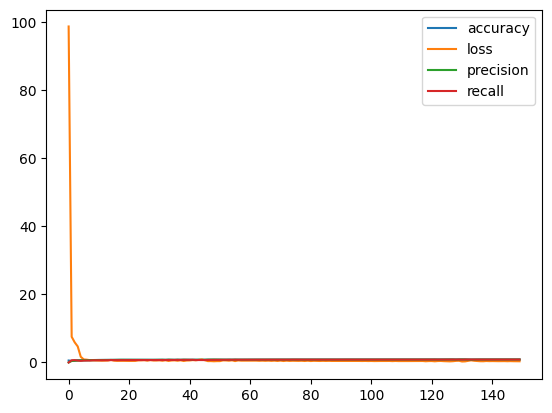

In [ ]:
pd.DataFrame(history7.history).plot()

After VIF

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model8= tf.keras.Sequential([
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(20, activation='relu'),
                            tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model8.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP3: Fit the model

history8= model8.fit(X_train4_nomulti, y_train4_nomulti, epochs= 150)

Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6183 - loss: 0.6814 - precision: 0.6138 - recall: 0.3331
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6967 - loss: 0.6251 - precision: 0.6712 - recall: 0.5800 
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.5996 - precision: 0.6867 - recall: 0.5935 
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7293 - loss: 0.5779 - precision: 0.7167 - recall: 0.6136 
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 0.5580 - precision: 0.7717 - recall: 0.6185 
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7587 - loss: 0.5393 - precision: 0.7850 - recall: 0.6044 
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7649 - loss: 0.5209 - precision: 0.8043 - recall: 0.5992 
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7634 - loss: 0.5044 - precision: 0.8040 - recall: 0.5949 
Epoch 9/150
18/18

In [ ]:
# Evaluate the model on the test data
test_results8 = model8.evaluate(X_test4_nomulti, y_test4_nomulti, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 2.5096 - precision: 0.7213 - recall: 0.5885  


<Axes: >

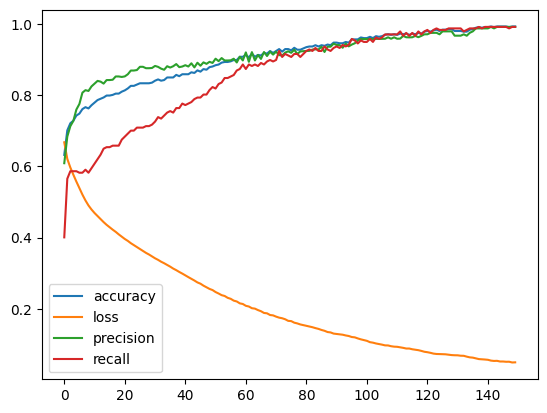

In [ ]:
pd.DataFrame(history8.history).plot()